In [2]:
import numpy as np
from scipy import stats

from cobaya.theory import Theory
from cobaya.run import run
from cobaya.log import LoggedError

from getdist.mcsamples import MCSamplesFromCobaya
import getdist.plots as gdplt

In [8]:
rng = np.random.default_rng(12345)


simple_coef_truth = np.array([0.1])
poly_truth = np.polynomial.Polynomial(simple_coef_truth)
sample_std_dev = 0.05

n_samples = 100
sample_points = np.linspace(-1,1,num=n_samples)
samples_truth = poly_truth(sample_points)
sample_noise = rng.normal(0, sample_std_dev, n_samples)
sample_observed = samples_truth+sample_noise

model_dim  =  1
model_keys =  tuple('q'+str(i) for i in range(model_dim))
model_ranges = dict((k,(-1,1)) for k in model_keys)

exec("def get_polynomial_vals(" + ",".join(model_keys) + "): return np.polynomial.Polynomial(["+",".join(model_keys)+"])(sample_points)")

exec("def noisy_data_logp(" + ",".join(model_keys) + "): return stats.multivariate_normal.logpdf(get_polynomial_vals(" + ",".join(model_keys) + "), mean=sample_observed, cov=sample_std_dev)")

likelihood_info = {'noisy_data_like': noisy_data_logp}
params_info = {k: {"prior": {"min": -1, "max": 1}} for k in model_keys}
sampler_info = {'mcmc':{'Rminus1_stop': 0.01, 'max_tries':1000}}
info = {'likelihood':likelihood_info,
        'params':params_info,
        'sampler':sampler_info}

updated_info, sampler0 = run(info)

[noisy_data_like] Initialized external likelihood.
[mcmc] Getting initial point... (this may take a few seconds)
[prior] Reference values or pdf's for some parameters were not provided. Sampling from the prior instead for those parameters.
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {noisy_data_like: 2250.0}
[prior] *WARNING* Reference pdf not defined or improper for some parameters. Using prior's sigma instead for them.
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Initial point: q0:0.5083439
[mcmc] Sampling!
[mcmc] Progress @ 2022-03-01 10:47:57 : 1 steps taken, and 0 accepted.
[mcmc] Learn + convergence test @ 40 samples accepted.
[mcmc]  - Acceptance rate: 0.025
[mcmc]  - Convergence of means: R-1 = 0.250900 after 40 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 80 s

[root] *WARNING* outlier fraction 0.06458333333333334 


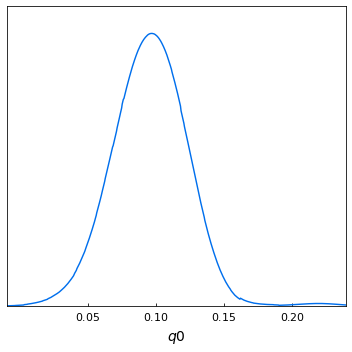

In [10]:
gdsamples0 = MCSamplesFromCobaya(updated_info, sampler0.products()["sample"])
gdplot = gdplt.get_subplot_plotter(width_inch=5)
gdplot.triangle_plot(gdsamples0, model_keys, filled=True)

In [110]:
rng = np.random.default_rng(5)
pert_min = 2
pert_max = 4
pert_order = rng.integers(low=pert_min, high=pert_max, size=1)

coefs_truth = np.zeros(pert_max+1)
coefs_truth[0] = 0.75
coefs_truth[pert_order] = 0.1

poly_truth = np.polynomial.Polynomial(coefs_truth)
sample_std_dev = 0.05

In [111]:
n_samples = 100
sample_points = np.linspace(-1,1,num=n_samples)
samples_truth = poly_truth(sample_points)
sample_noise = rng.normal(0, sample_std_dev, n_samples)
sample_observed = samples_truth+sample_noise

model_dim  =  pert_max+1
model_keys =  tuple('q'+str(i) for i in range(model_dim))
model_ranges = dict((k,{"min": -1, "max": 1}) for k in model_keys[:3])
model_ranges |= dict((k,{"min": -0.2, "max": 0.2}) for k in model_keys[3:])

exec("def get_polynomial_vals(" + ",".join(model_keys) + "): return np.polynomial.Polynomial(["+",".join(model_keys)+"])(sample_points)")

exec("def noisy_data_logp(" + ",".join(model_keys) + "): return stats.multivariate_normal.logpdf(get_polynomial_vals(" + ",".join(model_keys) + "), mean=sample_observed, cov=sample_std_dev)")

likelihood_info = {'noisy_data_like': noisy_data_logp}
params_info = {k: {"prior": model_ranges[k]} for k in model_keys}
sampler_info = {'mcmc':{'Rminus1_stop': 0.005,'max_tries': 10000}}
info = {'likelihood':likelihood_info,
        'params':params_info,
        'sampler':sampler_info,
        'max_tries': np.inf}
updated_info, sampler2 = run(info)

[noisy_data_like] Initialized external likelihood.
[mcmc] Getting initial point... (this may take a few seconds)
[prior] Reference values or pdf's for some parameters were not provided. Sampling from the prior instead for those parameters.
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {noisy_data_like: 1840.0}
[prior] *WARNING* Reference pdf not defined or improper for some parameters. Using prior's sigma instead for them.
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Initial point: q0:-0.5783579, q1:-0.5744483, q2:0.1460214, q3:0.1472879, q4:0.08787219
[mcmc] Sampling!
[mcmc] Progress @ 2022-03-01 13:54:51 : 1 steps taken, and 0 accepted.
[mcmc] Learn + convergence test @ 200 samples accepted.
[mcmc]  - Acceptance rate: 0.021
[mcmc]  - Convergence of means: R-1 = 14.274514 after 200 accepted steps
[mcmc]  - Updated covariance 

[root] *WARNING* outlier fraction 0.002631578947368421 
[root] *WARNING* auto bandwidth for q4 very small or failed (h=0.0001241528143175177,N_eff=107.10655331263003). Using fallback (h=0.1460632907381148)
[root] *WARNING* 2D kernel density bandwidth optimizer failed for q0, q4. Using fallback width: f(a) and f(b) must have different signs
[root] *WARNING* 2D kernel density bandwidth optimizer failed for q2, q4. Using fallback width: f(a) and f(b) must have different signs


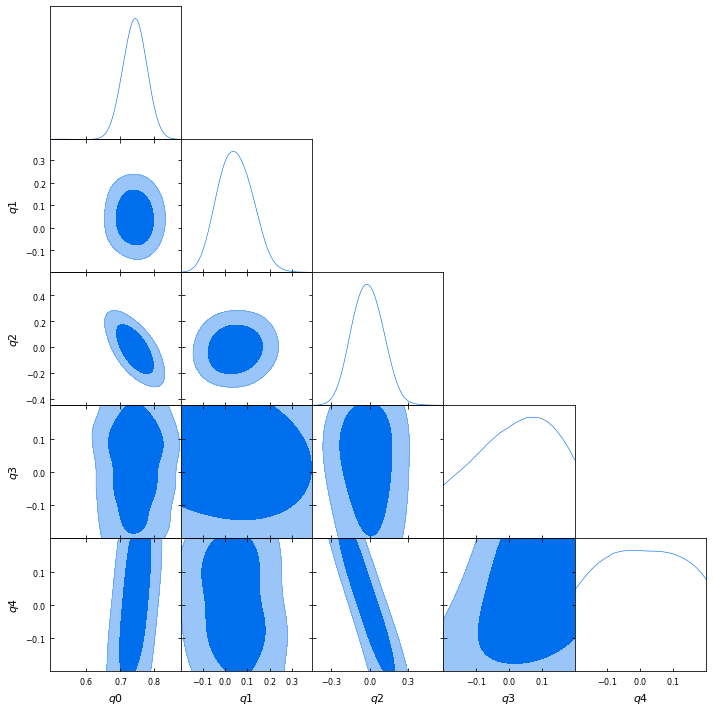

In [112]:
gdsamples2 = MCSamplesFromCobaya(updated_info, sampler2.products()["sample"])
gdplot = gdplt.get_subplot_plotter(width_inch=10)
gdplot.triangle_plot(gdsamples2, model_keys, filled=True)

In [92]:
poly_truth

Polynomial([0.75, 0.  , 0.  , 0.1 , 0.  ], domain=[-1,  1], window=[-1,  1])

In [108]:
gdsamples2.std(model_keys)

array([0.02412788, 0.05561814, 0.09924562, 0.07546723, 0.09865147])

In [115]:
gdsamples2.confidence('q1',0.025)

-0.0962099886786155

In [25]:
poly_truth

Polynomial([-0.36648332,  0.59473091,  0.35250934,  0.        ,  0.        ,
       -0.02177809], domain=[-1,  1], window=[-1,  1])

In [34]:
def foo(a):
        return a

foo.__code__.co_varnames

('a',)